## Imports

### Install packages.

In [2]:
!sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet jupyterlab-vim)"
!jupyter labextension enable

In [3]:
# # From https://pypi.org/project/jupyter-black/
# # https://github.com/n8henrie/jupyter-black
# !sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet jupyterlab-black)"
# import black
# import jupyter_black

# jupyter_black.load(
#     lab=False,
#     line_length=79,
#     verbosity="DEBUG",
#     target_version=black.TargetVersion.PY310,
# )

# #%load_ext jupyter_black

DEBUG:jupyter_black:config: {'line_length': 79, 'target_versions': {<TargetVersion.PY310: 10>}}


<IPython.core.display.Javascript object>

In [4]:
try:
    import preliz as pz
except ModuleNotFoundError:
    !sudo /bin/bash -c "(source /venv/bin/activate; pip install --quiet preliz)"
    pass

### Print module signature.

In [5]:
import utils

utils.notebook_signature()

Python 3.12.3
Linux 689d1a3566d0 6.12.5-linuxkit #1 SMP Tue Jan 21 10:23:32 UTC 2025 aarch64 aarch64 aarch64 GNU/Linux
numpy version=1.26.4
pymc version=5.18.2
matplotlib version=3.10.0
arviz version=0.20.0
preliz version=0.15.0


### Import modules

In [6]:
%load_ext autoreload
%autoreload 2

import logging

import arviz as az
import pymc as pm
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import preliz as pz

### Style notebook.

In [7]:
plt.rcParams['figure.figsize'] = [8, 3]

### Refs

https://github.com/aloctavodia/BAP3/blob/main/code/Chp_01.ipynb
https://github.com/jhrcook/bayesian-analysis-with-python_e2/tree/master/data
https://github.com/aloctavodia/BAP

/Users/saggese/src/github/bayesian-analysis-with-python_e2

cp ~/src/github/bayesian-analysis-with-python_e2/data/tips.csv ~/src/git_gp1/code/book.2018.Martin.Bayesian_Analysis_with_Python.2e/

# Chap1: Thinking probabilistically

## Gaussian

In [8]:
np.random.seed(42)

# Create a Normal Gaussian.
mu = 0.0
sigma = 1.0
X = stats.norm(mu, sigma)

# Print 3 realizations.
x = X.rvs(3)
print(x)

[ 0.49671415 -0.1382643   0.64768854]


Text(0, 0.5, 'p(x)')

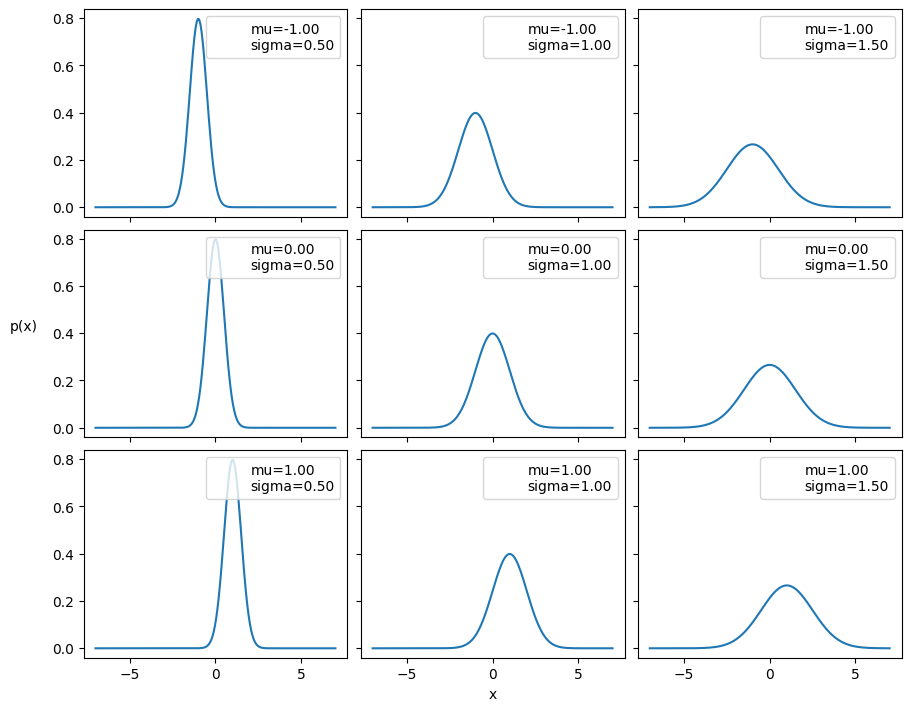

In [9]:
# - Plot Gaussian PDF for different values of the params.

mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
# Create a 3x3 plot.
_, ax = plt.subplots(len(mu_params),
                     len(sd_params),
                     sharex=True,
                     sharey=True,
                     figsize=(9, 7),
                     # Fit plots into the figure cleanly.
                     constrained_layout=True)
                     #constrained_layout=False)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        # Evaluate the PDF in several points.
        y = stats.norm(mu, sd).pdf(x)
        # Plot the PDF.
        ax[i, j].plot(x, y)
        # Add the legend.
        ax[i, j].plot([], label="mu={:3.2f}\nsigma={:3.2f}".format(mu, sd), alpha=0)
        ax[i, j].legend(loc=1)
ax[2, 1].set_xlabel('x')
ax[1, 0].set_ylabel('p(x)', rotation=0, labelpad=20)
#ax[1, 0].set_yticks([])

In [10]:
params = {
    #"kind": "cdf",
    "kind": "pdf",
    "pointinterval": False,
    "interval": "hdi",   # Highest density interval.
    #"interval": "eti",  # Equal tailed interval.
    "xy_lim": "auto"
}

pz.Normal(mu=0, sigma=1).plot_interactive(**params)

interactive(children=(FloatSlider(value=0.0, description='mu (-inf, inf)', max=10.0, min=-10.0, style=SliderSt…

In [11]:
# Generate some samples.
pdf = pz.Normal(mu=0, sigma=1)
pdf.rvs(10)

array([ 3.08020378e-01, -2.51157736e-01, -2.12223003e+00,  3.58578007e-01,
       -2.75792987e-01,  1.12241375e-03, -8.73779938e-01, -1.12751508e+00,
        4.73066663e-01,  2.01807668e-02])

In [12]:
#?plt.hist

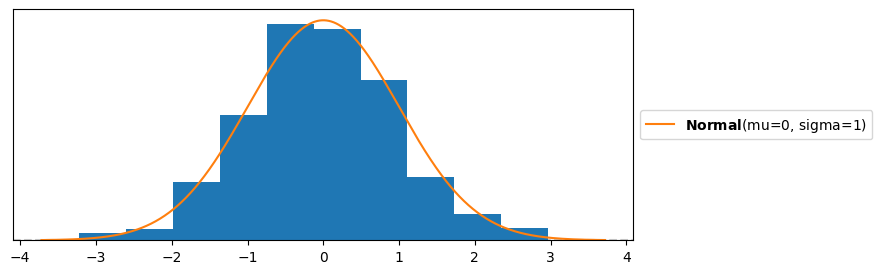

In [13]:
#n = 100
#n = 1000
n = 100_000_000
plt.hist(pdf.rvs(1000), density=True)
pdf.plot_pdf();

## Binomial

In [14]:
help(pz.Binomial.plot_interactive)

Help on function plot_interactive in module preliz.distributions.distributions:

plot_interactive(self, kind='pdf', xy_lim='both', pointinterval=True, interval='hdi', levels=None, figsize=None)
    Interactive exploration of distributions parameters

    Parameters
    ----------
    kind : str:
        Type of plot. Available options are `pdf`, `cdf` and `ppf`.
    xy_lim : str or tuple
        Set the limits of the x-axis and/or y-axis.
        Defaults to `"both"`, the limits of both axis are fixed.
        Use `"auto"` for automatic rescaling of x-axis and y-axis.
        Or set them manually by passing a tuple of 4 elements,
        the first two for x-axis, the last two for y-axis. The tuple can have `None`.
    pointinterval : bool
        Whether to include a plot of the quantiles. Defaults to False. If True the default is to
        plot the median and two interquantiles ranges.
    interval : str
        Type of interval. Available options are highest density interval `"hdi"`

In [15]:
params = {
    #"kind": "cdf",
    "kind": "pdf",
    "pointinterval": False,
    "interval": "hdi",   # Highest density interval.
    #"interval": "eti",  # Equal tailed interval.
    "xy_lim": "auto"
}

# Probability of k successes on N trial flipping a coin with p success
pz.Binomial(p=0.5, n=5).plot_interactive(**params)

interactive(children=(IntSlider(value=5, description='n (0, inf)', max=15, style=SliderStyle(description_width…

## Beta

- Continuous prob distribution defined in [0, 1]
- It is useful to model probability or proportion
    - E.g., the probability of success in a Bernoulli trial

- alpha represents "success" parameter
- beta represents "failure" parameter
    - When alpha is larger than beta the distribution skews toward 1, indicating a higher probability of success
    - When alpha = beta the distribution is symmetric and centered around 0.5

In [16]:
params = {
    #"kind": "cdf",
    "kind": "pdf",
    "pointinterval": False,
    "interval": "hdi",   # Highest density interval.
    #"interval": "eti",  # Equal tailed interval.
    "xy_lim": "auto"
}

alpha = 3.0
beta = 1.0

pz.Beta(alpha=alpha, beta=beta).plot_interactive(**params)

interactive(children=(FloatSlider(value=3.0, description='alpha (0, inf)', max=13.0, min=2.220446049250313e-16…

In [17]:
np.random.seed(123)

trials = 4
# Unknown value.
theta_real = 0.35

# Generate some values.
data = stats.bernoulli.rvs(p=theta_real, size=trials)
print(data)

[1 0 0 0]


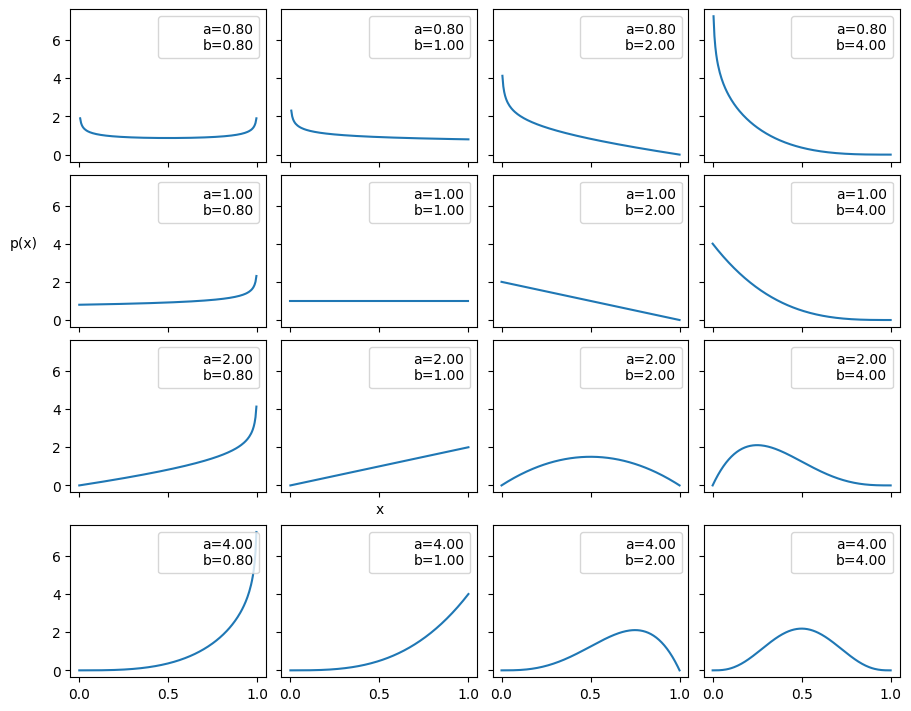

In [18]:
params1 = [0.8, 1.0, 2.0, 4.0]
params2 = [0.8, 1.0, 2.0, 4.0]
x = np.linspace(0, 1, 200)
# Create a plot.
_, ax = plt.subplots(len(params1),
                     len(params2),
                     sharex=True,
                     sharey=True,
                     figsize=(9, 7),
                     # Fit plots into the figure cleanly.
                     constrained_layout=True)
                     #constrained_layout=False)
for i in range(len(params1)):
    for j in range(len(params2)):
        param1 = params1[i]
        param2 = params2[j]
        # Evaluate the PDF in several points.
        y = stats.beta(a=param1, b=param2).pdf(x)
        # Plot the PDF.
        ax[i, j].plot(x, y)
        # Add the legend.
        ax[i, j].plot([], label="a={:3.2f}\nb={:3.2f}".format(param1, param2), alpha=0)
        ax[i, j].legend(loc=1)
ax[2, 1].set_xlabel('x')
ax[1, 0].set_ylabel('p(x)', rotation=0, labelpad=20);
#ax[1, 0].set_yticks([])

### Beta in function of mean and concentration.

In [75]:
#help(stats.beta)

In [76]:
params = {
    #"kind": "cdf",
    "kind": "pdf",
    "pointinterval": False,
    "interval": "hdi",   # Highest density interval.
    #"interval": "eti",  # Equal tailed interval.
    "xy_lim": "auto"
}

mu = 1.0
nu = 0.1
alpha = mu * nu
beta = (1.0 - mu) * nu
print(alpha, beta)

# x = np.linspace(0, 1, 200)
# y = stats.beta(a=alpha, b=beta).pdf(x)
# # Plot the PDF.
# plt.plot(x, y);

pz.Beta(mu=0.5, nu=0.5).plot_interactive(**params)

0.1 0.0


interactive(children=(FloatSlider(value=0.5, description='mu (0, 1)', max=0.9999999999999998, min=2.2204460492…

## BetaBinomial

- Discrete RV
- Represent the probability of success in a series of Bernoulli trials
- The Binomial models the number of successes in a fixed number of trials $n$
- The probability of success $p$ is not fixed but follows a Beta distribution

In [19]:
pz.BetaBinomial(alpha=10, beta=10, n=6).plot_interactive()

interactive(children=(FloatSlider(value=10.0, description='alpha (0, inf)', max=110.0, min=2.220446049250313e-…

In [20]:
# Generate some samples.
pz.BetaBinomial(alpha=10, beta=10, n=60).rvs(100)

array([31, 39, 21, 27, 29, 23, 25, 21, 26, 32, 37, 22, 27, 22, 25, 17, 28,
       32, 25, 23, 27, 22, 27, 28, 40, 31, 38, 18, 40, 44, 30, 34, 35, 20,
       39, 24, 30, 13, 22, 21, 32, 45, 31, 37, 32, 22, 36, 31, 39, 32, 33,
       26, 26, 26, 25, 21, 33, 30, 29, 24, 27, 14, 34, 34, 28, 34, 30, 29,
       35, 24, 22, 25, 42, 29, 27, 22, 27, 43, 23, 23, 28, 33, 26, 35, 24,
       34, 29, 41, 35, 23, 27, 33, 30, 32, 26, 28, 10, 31, 31, 45])

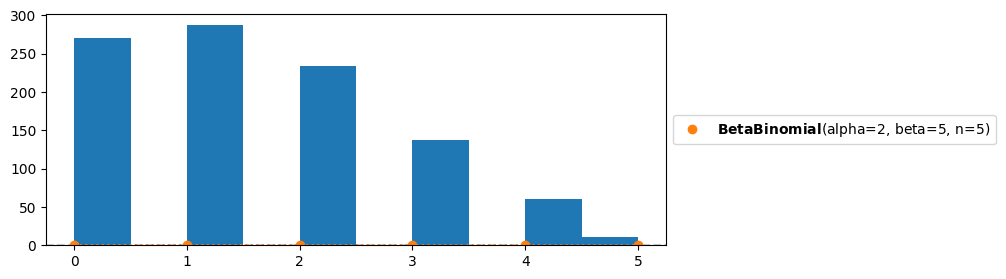

In [21]:
# Generate samples.
plt.hist(pz.BetaBinomial(alpha=2, beta=5, n=5).rvs(1000))
pz.BetaBinomial(alpha=2, beta=5, n=5).plot_pdf();

## BetaScaled

In [22]:
help(pz.BetaScaled.__init__)

Help on function __init__ in module preliz.distributions.betascaled:

__init__(self, alpha=None, beta=None, lower=0, upper=1)
    Initialize self.  See help(type(self)) for accurate signature.



In [23]:
pz.BetaScaled(alpha=2.0, beta=1.0, lower=-5, upper=5).plot_interactive(**params)

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16…

## SkewNormal

In [24]:
help(pz.SkewNormal.__init__)

Help on function __init__ in module preliz.distributions.skewnormal:

__init__(self, mu=None, sigma=None, alpha=None, tau=None)
    Initialize self.  See help(type(self)) for accurate signature.



In [25]:
# Alpha controls the skewness.
pz.SkewNormal(mu=0, sigma=1.0, alpha=1.0).plot_interactive(**params)

interactive(children=(FloatSlider(value=0.0, description='mu (-inf, inf)', max=10.0, min=-10.0, style=SliderSt…

## StudentT

In [26]:
help(pz.StudentT.__init__)

Help on function __init__ in module preliz.distributions.studentt:

__init__(self, nu=None, mu=None, sigma=None, lam=None)
    Initialize self.  See help(type(self)) for accurate signature.



In [27]:
pz.StudentT(mu=0, sigma=1, nu=3.0).plot_interactive(**params)

interactive(children=(FloatSlider(value=3.0, description='nu (0, inf)', max=13.0, min=2.220446049250313e-16, s…

## Half normal

In [28]:
help(pz.HalfNormal.__init__)

Help on function __init__ in module preliz.distributions.halfnormal:

__init__(self, sigma=None, tau=None)
    Initialize self.  See help(type(self)) for accurate signature.



In [29]:
pz.HalfNormal(sigma=1.0).plot_interactive(**params)

interactive(children=(FloatSlider(value=1.0, description='sigma (0, inf)', max=11.0, min=2.220446049250313e-16…

## Exponential

In [30]:
help(pz.Exponential.__init__)

Help on function __init__ in module preliz.distributions.exponential:

__init__(self, lam=None, beta=None)
    Initialize self.  See help(type(self)) for accurate signature.



In [31]:
pz.Exponential(beta=1.0).plot_interactive(**params)

interactive(children=(FloatSlider(value=1.0, description='beta (0, inf)', max=11.0, min=2.220446049250313e-16,…

## Gamma

In [32]:
#help(pz.Gamma)
help(pz.Gamma.__init__)

# Represents the sum of alpha exponentially distributed random variables,
# each of which has rate beta.

Help on function __init__ in module preliz.distributions.gamma:

__init__(self, alpha=None, beta=None, mu=None, sigma=None)
    Initialize self.  See help(type(self)) for accurate signature.



- Model the time until an event occurs a certain number of times, assuming that the event follows a Poisson
  process (where events occur independently at a constant average rate). 

In [33]:
pz.Gamma(alpha=1.0, beta=1.0).plot_interactive(**params)

interactive(children=(FloatSlider(value=1.0, description='alpha (0, inf)', max=11.0, min=2.220446049250313e-16…

## Poisson

- Model the number of events in a fixed interval of time, space, etc
- We assume that the events happen independently and at a constant average rate
- Assume mean equal to variance

- E.g.,
  - Call centers: model the number of customers per hour
  - Natural events: predict the number of earthquakes in a given region over a specific time
  - Traffic flow: number of cars passing through a toll booth in a day
  - Biology: count the number of mutations in a specific DNA segment over time

In [77]:
?pz.Poisson.__init__

Signature: pz.Poisson.__init__(self, mu=None)
Docstring: Initialize self.  See help(type(self)) for accurate signature.
File:      /venv/lib/python3.12/site-packages/preliz/distributions/poisson.py
Type:      function

In [78]:
pz.Poisson(mu=1.0).plot_interactive(**params)

interactive(children=(FloatSlider(value=1.0, description='mu (0, inf)', max=11.0, min=2.220446049250313e-16, s…

## NegativeBinomial

- Model the number of failures/trials to achieve a fixed number of successes in a sequence of IID Bernoulli trials
- It is a generalization of the geometric distribution, which models the number of trials needed to achieve the first success
- It models overdispersion (i.e., when mean is much smaller than variance)

- E.g.,
    - Customer service: model the number of unsuccessful customer interactions before achieving success
    - Sports: number of games a team needs to lose before winning a number of games

## Flipping coins pyMC-style

In [34]:
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

params = (1, 1)
x = np.linspace(0, 1, 2000)

In [79]:
#help(pm.sample)

In [36]:
import contextlib
import os
import sys


def get_posterior(alpha, beta, data, verbosity=False):
    if not verbosity:
        old_val = logging.getLogger('pymc').getEffectiveLevel()
        logging.getLogger('pymc').setLevel(logging.WARNING)
    #
    with pm.Model() as model:
        # - Prior.
        # \theta ~ Beta(\alpha=1, \beta=1)
        theta = pm.Beta("theta", alpha=alpha, beta=beta)
        # Likelihood.
        # - We pass the data using `observed` to condition the unknown to the knows (data).
        y = pm.Bernoulli('y', p=theta, observed=data)
        # Inference button.
        # - Compute 1000 samples from the posterior and store in `idata`.
        # - NUTS is a sampler that works for continuous variables.
        #
        idata = pm.sample_prior_predictive()
        idata_sample = pm.sample(1000, progressbar=False, chains=1, random_seed=123)
        idata.extend(idata_sample)
        pm.sample_posterior_predictive(idata, extend_inferencedata=True)
    if not verbosity:
        logging.getLogger('pymc').setLevel(old_val)
    return idata

In [37]:
import logging

In [38]:
def generate_data(n_heads, n_trials):
    assert n_heads <= n_trials
    data = [1] * n_heads + [0] * (n_trials - n_heads)
    return data

In [39]:
data = generate_data(5, 10)

In [40]:
idata = get_posterior(1, 1, data)

Output()

In [41]:
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

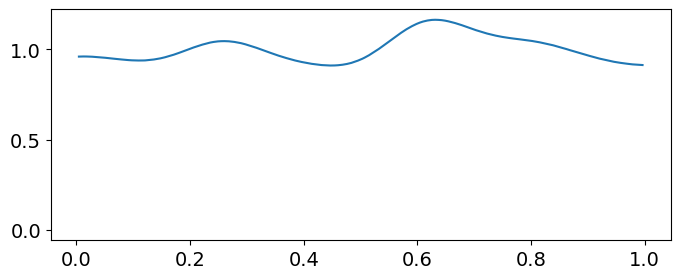

In [42]:
#az.plot_kde(idata.posterior["theta"].values);
az.plot_kde(idata.prior["theta"].values);

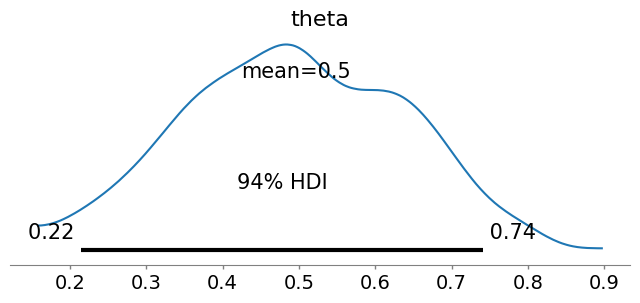

In [43]:
az.plot_posterior(idata);

In [44]:
#np.ravel(idata.posterior.theta.values)

In [45]:
sns.kdeplot(np.ravel(idata.posterior.theta.values))
#theta = pm.Beta("

DEBUG:jupyter_black:('unterminated string literal (detected at line 2)', (2, 17))


SyntaxError: unterminated string literal (detected at line 2) (2499794323.py, line 2)

## 

In [ ]:
for idx in range(len(n_trials)):
    n_h = n_heads[idx]
    n_t = n_trials[idx]
    data = generate_data(n_h, n_t)
    
    
        